In [1]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt

In [2]:
data = pd.read_csv('FuelConsumption.csv')
data.head()

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2014,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,2014,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,2014,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,2014,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,2014,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


In [3]:
data.describe()

,MODELYEAR,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
count,1067.0,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000
mean,2014.0,3.346298,5.794752,13.296532,9.474602,11.580881,26.441425,256.228679
std,0.0,1.415895,1.797447,4.101253,2.794510,3.485595,7.468702,63.372304
min,2014.0,1.000000,3.000000,4.600000,4.900000,4.700000,11.000000,108.000000
25%,2014.0,2.000000,4.000000,10.250000,7.500000,9.000000,21.000000,207.000000
50%,2014.0,3.400000,6.000000,12.600000,8.800000,10.900000,26.000000,251.000000
75%,2014.0,4.300000,8.000000,15.550000,10.850000,13.350000,31.000000,294.000000
max,2014.0,8.400000,12.000000,30.200000,20.500000,25.800000,60.000000,488.000000


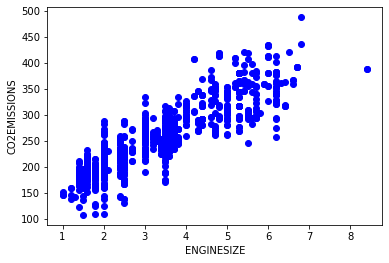

In [4]:
plt.scatter(data['ENGINESIZE'], data['CO2EMISSIONS'], color='blue')
plt.xlabel('ENGINESIZE')
plt.ylabel('CO2EMISSIONS')
plt.show()

In [5]:
msk = np.random.rand(len(data)) < 0.8
train = data[msk]
test = data[~msk]
print(len(train))
print(len(test))

891
176


In [6]:
train_x = np.array(train[['ENGINESIZE']])
train_y = np.array(train[['CO2EMISSIONS']])

test_x = np.array(test[['ENGINESIZE']])
test_y = np.array(test[['CO2EMISSIONS']])

In [7]:
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(degree=2)
train_x_poly = poly.fit_transform(train_x)
print(train_x_poly)

[[ 1.    2.    4.  ]
 [ 1.    2.4   5.76]
 [ 1.    1.5   2.25]
 ...
 [ 1.    3.2  10.24]
 [ 1.    3.2  10.24]
 [ 1.    3.2  10.24]]


In [8]:
from sklearn import linear_model

reg = linear_model.LinearRegression()
train_y_ = reg.fit(train_x_poly, train_y)
print("coe:", reg.coef_)
print("intercept:", reg.intercept_)

coe: [[ 0.         52.16154611 -1.7953291 ]]
intercept: [105.46131834]


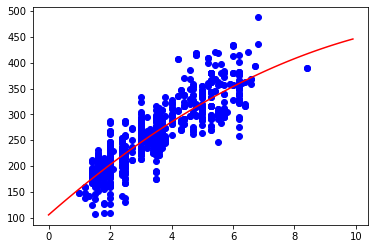

In [9]:
plt.scatter(train_x, train_y, color='blue')
x = np.arange(0, 10, 0.1)
y = reg.intercept_[0] + reg.coef_[0][0] + reg.coef_[0][1] * x + reg.coef_[0][2] * pow(x, 2)
plt.plot(x, y, color='red')
plt.show()

In [10]:
from sklearn.metrics import r2_score
test_x_poly = poly.fit_transform(test_x)
test_y_ = reg.predict(test_x_poly)
score = r2_score(test_y_, test_y)
print(score)

0.6807615860282226
